# RNN

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import pickle
import keras
import json
import os
import time
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


Loading the text data from the csv file 

In [3]:
train = pd.read_csv("C:/Users/manoj/Downloads/cleaned_merged_data.csv") 
train.Text=train.Text.astype(str) 

print(train.shape)
train.head()

(1649, 2)


,Sentiment,Text
0,neutral,Could you catch us up on your latest thinking ...
1,neutral,We continue to ramp up the activities for the ...
2,neutral,"I think, we're …"
3,neutral,"Greg, I wonder if I just get a couple of clari..."
4,negative,"First, we successfully increased our wallet sh..."


Renaming the categories in 0,1,2 

In [4]:
train['Sentiment'] = train['Sentiment'].replace({'positive': 0,'negative':1,'neutral':2})

X, y = (train['Text'].values, train['Sentiment'].values)

Converting the texts into tokens of words and assigning each word to an unique integer and taking maximum of 1000 words into an account for futher analysis

In [96]:
maxlen = 100  # We will cut reviews after 100 words
max_words = 1000

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tk = Tokenizer(num_words=max_words)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=1000, padding='post')



About 6385 Unique tokens in the given data

In [97]:
word_index = tk.word_index
print('Found {} unique tokens'.format(len(word_index)))

Found 6385 unique tokens


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.2, random_state = 1)

In [99]:
import numpy as np
from keras.utils import to_categorical
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Designing an simpleRNN model to classify the data

In [102]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, Flatten

vocabulary_size = 1000
embedding_size=32
max_word=1000
model = Sequential()
model.add(Embedding(vocabulary_size, 32,input_length=max_word))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.add(Dense(3, activation='softmax'))

model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 1000, 32)          32000     
_________________________________________________________________
simple_rnn_25 (SimpleRNN)    (None, 1000, 32)          2080      
_________________________________________________________________
simple_rnn_26 (SimpleRNN)    (None, 1000, 32)          2080      
_________________________________________________________________
simple_rnn_27 (SimpleRNN)    (None, 1000, 32)          2080      
_________________________________________________________________
simple_rnn_28 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 99        
Total params: 40,419
Trainable params: 40,419
Non-trainable params: 0
_________________________________________________________________


In [103]:
history=model.fit(X_train, y_train,validation_data=(X_test,y_test),batch_size=128,epochs=20,shuffle=True)

Train on 1319 samples, validate on 330 samples
Epoch 1/20
1319/1319 [==============================] - 15s 11ms/step - loss: 0.5994 - acc: 0.6305 - val_loss: 0.5721 - val_acc: 0.6586
Epoch 2/20
1319/1319 [==============================] - 13s 10ms/step - loss: 0.5632 - acc: 0.6573 - val_loss: 0.5719 - val_acc: 0.6667
Epoch 3/20
1319/1319 [==============================] - 13s 10ms/step - loss: 0.5633 - acc: 0.6598 - val_loss: 0.5689 - val_acc: 0.6586
Epoch 4/20
1319/1319 [==============================] - 13s 10ms/step - loss: 0.5597 - acc: 0.6720 - val_loss: 0.5683 - val_acc: 0.6667
Epoch 5/20
1319/1319 [==============================] - 13s 10ms/step - loss: 0.5639 - acc: 0.6694 - val_loss: 0.5670 - val_acc: 0.6667
Epoch 6/20
1319/1319 [==============================] - 13s 10ms/step - loss: 0.5615 - acc: 0.6705 - val_loss: 0.5707 - val_acc: 0.6667
Epoch 7/20
1319/1319 [==============================] - 13s 10ms/step - loss: 0.5604 - acc: 0.6641 - val_loss: 0.5816 - val_acc: 0.6586
E

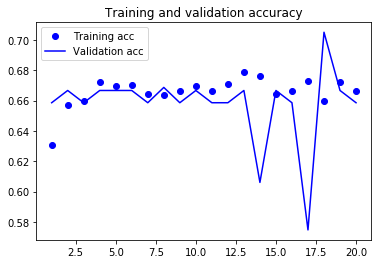

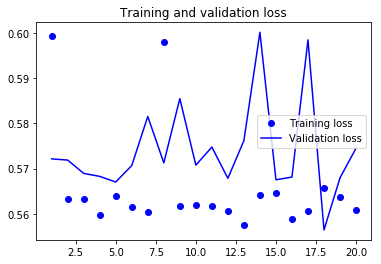

In [104]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

we can see from the plots that there is no much overfitting through out the model. 

In [105]:
score = model.evaluate(X_train, y_train, verbose=1)
print('Test Loss:', score[0], 'Test Accuracy:', score[1])

1319/1319 [==============================] - 9s 7ms/step
Test Loss: 0.5621866688437314 Test Accuracy: 0.6755117566590964


In [106]:
predictions = model.predict(X_test, verbose=1)

330/330 [==============================] - 3s 8ms/step


In [142]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix

In [146]:
cfm = confusion_matrix(y_test.argmax(axis=1), np.rint(predictions).argmax(axis=1))
cfm

array([[  0,   0, 135],
       [  0,   0,  34],
       [  0,   0, 161]], dtype=int64)

# Glove Embeddings

In [149]:
import os
import numpy as np

In [150]:
glove_dir = 'C:/Users/manoj/Desktop/deep_learning/NLP/glove/'

In [151]:
glove_dir

'C:/Users/manoj/Desktop/deep_learning/NLP/glove/'

In [152]:
embeddings_index = {}
f = open(os.path.join(os.getcwd(), glove_dir, 'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [153]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector


In [154]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=1000))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 1000, 100)         100000    
_________________________________________________________________
flatten_7 (Flatten)          (None, 100000)            0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                3200032   
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 99        
Total params: 3,300,131
Trainable params: 3,300,131
Non-trainable params: 0
_________________________________________________________________


Training the model using Glove Embeddings

In [155]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [156]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [157]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test),batch_size=128,epochs=20,shuffle=True)

Train on 1319 samples, validate on 330 samples
Epoch 1/20
1319/1319 [==============================] - 3s 3ms/step - loss: 0.6231 - acc: 0.6722 - val_loss: 0.6087 - val_acc: 0.6798
Epoch 2/20
1319/1319 [==============================] - 2s 2ms/step - loss: 0.6046 - acc: 0.6788 - val_loss: 0.5946 - val_acc: 0.6838
Epoch 3/20
1319/1319 [==============================] - 2s 2ms/step - loss: 0.5923 - acc: 0.6813 - val_loss: 0.5841 - val_acc: 0.6838
Epoch 4/20
1319/1319 [==============================] - 2s 1ms/step - loss: 0.5826 - acc: 0.6821 - val_loss: 0.5755 - val_acc: 0.6838
Epoch 5/20
1319/1319 [==============================] - 2s 1ms/step - loss: 0.5741 - acc: 0.6821 - val_loss: 0.5687 - val_acc: 0.6838
Epoch 6/20
1319/1319 [==============================] - 2s 1ms/step - loss: 0.5669 - acc: 0.6821 - val_loss: 0.5627 - val_acc: 0.6838
Epoch 7/20
1319/1319 [==============================] - 2s 2ms/step - loss: 0.5604 - acc: 0.6821 - val_loss: 0.5576 - val_acc: 0.6838
Epoch 8/20
1319

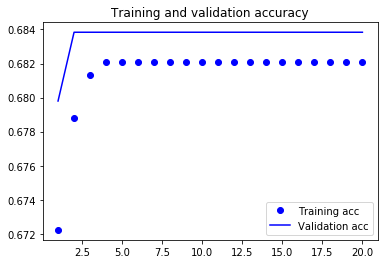

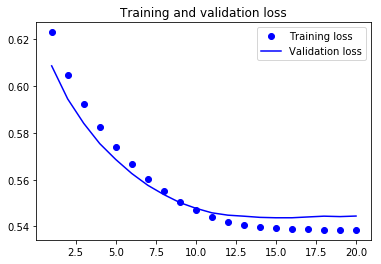

In [159]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [160]:
score = model.evaluate(X_train, y_train, verbose=1)
print('Test Loss:', score[0], 'Test Accuracy:', score[1])

1319/1319 [==============================] - 1s 821us/step
Test Loss: 0.538267181577603 Test Accuracy: 0.6820824071256567


In [161]:
predictions = model.predict(X_test, verbose=1)

330/330 [==============================] - 1s 2ms/step


In [162]:
cfm = confusion_matrix(y_test.argmax(axis=1), np.rint(predictions).argmax(axis=1))
cfm

array([[135,   0,   0],
       [ 34,   0,   0],
       [144,   0,  17]], dtype=int64)

# BOW Model

In [163]:
train = pd.read_csv("C:/Users/manoj/Downloads/cleaned_merged_data.csv") 
train.Text=train.Text.astype(str) 

print(train.shape)
train.head()

(1649, 2)


,Sentiment,Text
0,neutral,Could you catch us up on your latest thinking ...
1,neutral,We continue to ramp up the activities for the ...
2,neutral,"I think, we're …"
3,neutral,"Greg, I wonder if I just get a couple of clari..."
4,negative,"First, we successfully increased our wallet sh..."


In [164]:
train['Sentiment'] = train['Sentiment'].replace({'positive': 0,'negative':1,'neutral':2})

X, y = (train['Text'].values, train['Sentiment'].values)

In [165]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tk = Tokenizer(num_words=max_words)
tk.fit_on_texts(X)
X = tk.texts_to_matrix(X, mode='freq')


In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [167]:
import numpy as np
from keras.utils import to_categorical
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [168]:
n_words = X.shape[1]

model = Sequential()

model.add(Dense(50, input_shape=(n_words,), activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 50)                50050     
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 153       
Total params: 50,203
Trainable params: 50,203
Non-trainable params: 0
_________________________________________________________________


In [169]:
history=model.fit(X_train, y_train,validation_data=(X_test,y_test),batch_size=128,epochs=20,shuffle=True)

Train on 1319 samples, validate on 330 samples
Epoch 1/20
1319/1319 [==============================] - 1s 964us/step - loss: 0.6235 - acc: 0.6667 - val_loss: 0.6108 - val_acc: 0.6667
Epoch 2/20
1319/1319 [==============================] - 0s 45us/step - loss: 0.6026 - acc: 0.6667 - val_loss: 0.5950 - val_acc: 0.6667
Epoch 3/20
1319/1319 [==============================] - 0s 46us/step - loss: 0.5867 - acc: 0.6667 - val_loss: 0.5809 - val_acc: 0.6667
Epoch 4/20
1319/1319 [==============================] - 0s 45us/step - loss: 0.5720 - acc: 0.6667 - val_loss: 0.5677 - val_acc: 0.6667
Epoch 5/20
1319/1319 [==============================] - 0s 46us/step - loss: 0.5583 - acc: 0.6732 - val_loss: 0.5557 - val_acc: 0.7020
Epoch 6/20
1319/1319 [==============================] - 0s 46us/step - loss: 0.5458 - acc: 0.7015 - val_loss: 0.5445 - val_acc: 0.7111
Epoch 7/20
1319/1319 [==============================] - 0s 45us/step - loss: 0.5345 - acc: 0.7154 - val_loss: 0.5354 - val_acc: 0.7253
Epoch 8

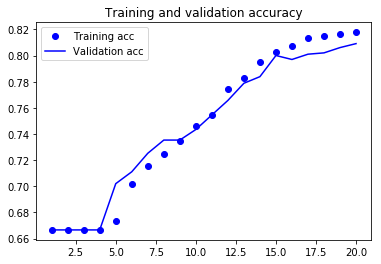

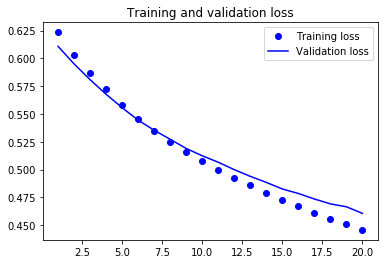

In [170]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [171]:
score = model.evaluate(X_train, y_train, verbose=1)
print('Test Loss:', score[0], 'Test Accuracy:', score[1])

1319/1319 [==============================] - 0s 46us/step
Test Loss: 0.4419598475697368 Test Accuracy: 0.8205711600272559


In [172]:
predictions = model.predict(X_test, verbose=1)

330/330 [==============================] - 0s 1ms/step


In [173]:
cfm = confusion_matrix(y_test.argmax(axis=1), np.rint(predictions).argmax(axis=1))
cfm

array([[120,   0,  15],
       [ 25,   0,   9],
       [ 54,   0, 107]], dtype=int64)